In [17]:
import pywt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet, estimate_sigma
%matplotlib notebook

In [2]:
# Read data from .csv file
X = np.genfromtxt('./data/X_852.356.csv', delimiter=',')

print(f'shape of X: {X.shape}\nTotal number of sample is: {X.shape[0]}\nTotal number of features are: {X.shape[1]} ')

shape of X: (121, 4095)
Total number of sample is: 121
Total number of features are: 4095 


In [3]:
signal = X[2]

### Denoising using scikit function

In [15]:
y = denoise_wavelet(signal, wavelet='db1', mode='soft', wavelet_levels=5, method='BayesShrink', rescale_sigma='True')

<IPython.core.display.Javascript object>


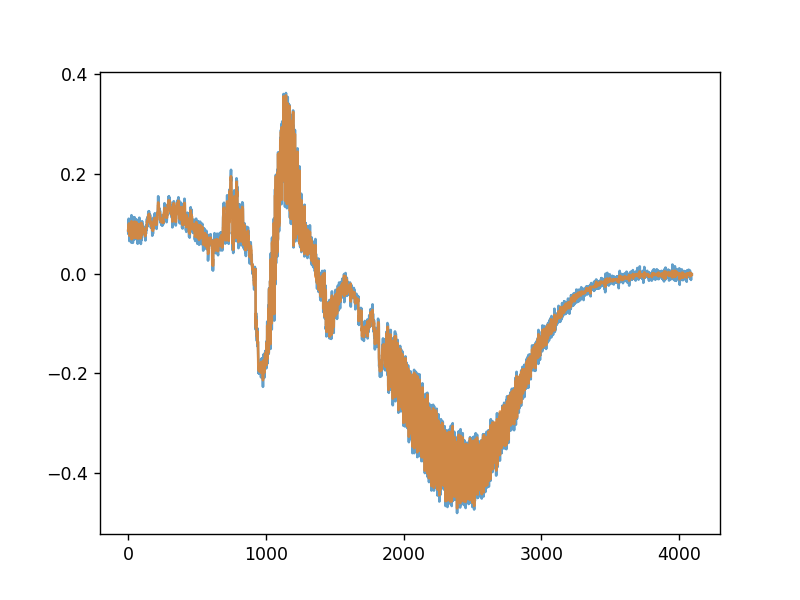

In [16]:
plt.close()
plt.plot(signal, alpha = 0.7)
plt.plot(y, alpha = 0.7)
plt.show()

In [55]:
sigma_est = estimate_sigma(signal, average_sigmas=True)
im_visushrink = denoise_wavelet(signal, wavelet='db8', method='VisuShrink', mode='soft', sigma=sigma_est*4, rescale_sigma=True)

<IPython.core.display.Javascript object>


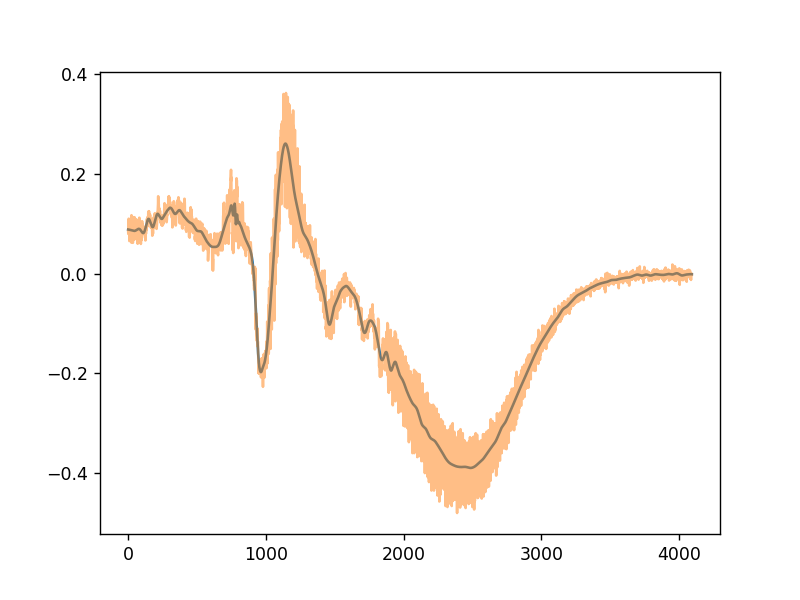

In [56]:
plt.close()
plt.plot(im_visushrink, alpha = 1)
plt.plot(signal, alpha = 0.5)
plt.show()

In [67]:
sigma_est = estimate_sigma(signal, average_sigmas=True)
im_visushrink = denoise_wavelet(signal, wavelet='db8', wavelet_levels=6, method='VisuShrink', mode='soft', sigma=sigma_est*4, rescale_sigma=True)

<IPython.core.display.Javascript object>


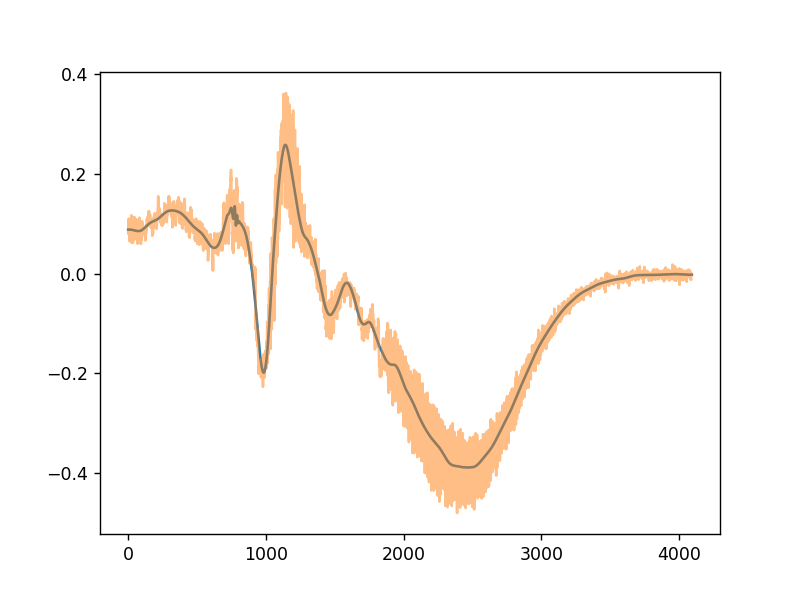

In [68]:
plt.close()
plt.plot(im_visushrink, alpha = 1)
plt.plot(signal, alpha = 0.5)
plt.show()

### Verification on other set

In [167]:
signal = X[5]

In [168]:
sigma_est = estimate_sigma(signal, average_sigmas=True)
im_visushrink = denoise_wavelet(signal, wavelet='db8', wavelet_levels=6, method='VisuShrink', mode='soft', sigma=sigma_est*4, rescale_sigma=True)

<IPython.core.display.Javascript object>


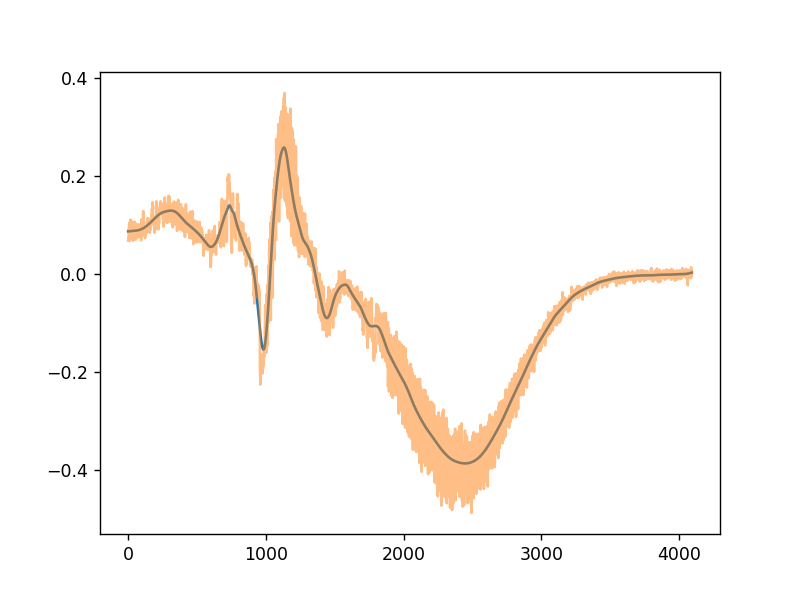

In [169]:
plt.close()
plt.plot(im_visushrink, alpha = 1)
plt.plot(signal, alpha = 0.5)
plt.show()

### Checking on photodiode 1

In [171]:
data = np.genfromtxt('./data/data_0.csv', delimiter=',')

In [172]:
pd1 = data[:,1]
pd2 = data[:,2]

In [173]:
pd1_f = denoise_wavelet(pd1, wavelet='db8', wavelet_levels=6, method='VisuShrink', mode='soft', sigma=estimate_sigma(pd1, average_sigmas=True)*4, rescale_sigma=True)
pd2_f = denoise_wavelet(pd1, wavelet='db8', wavelet_levels=6, method='VisuShrink', mode='soft', sigma=estimate_sigma(pd2, average_sigmas=True)*4, rescale_sigma=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5816\1892736704.py:1: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


<IPython.core.display.Javascript object>


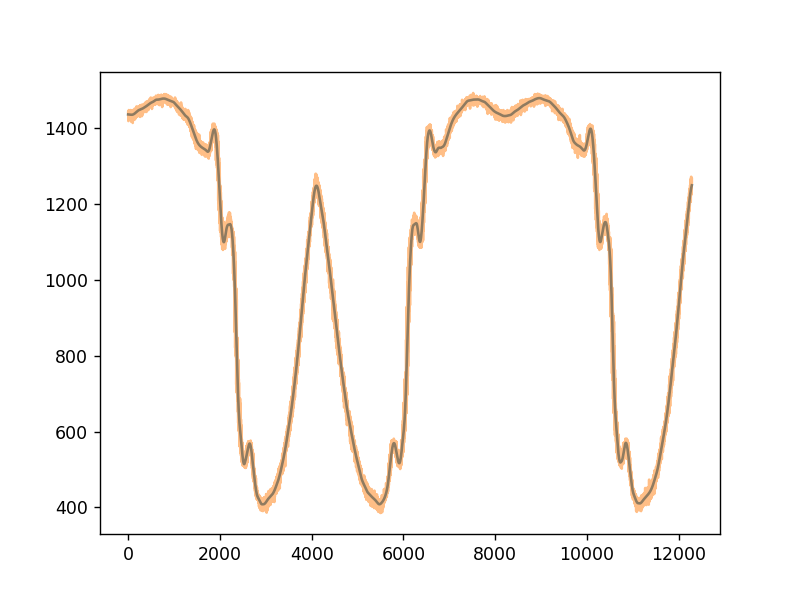

In [174]:
plt.close()
plt.plot(pd1_f, alpha = 1)
plt.plot(pd1, alpha = 0.5)
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5816\3272261046.py:1: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


<IPython.core.display.Javascript object>


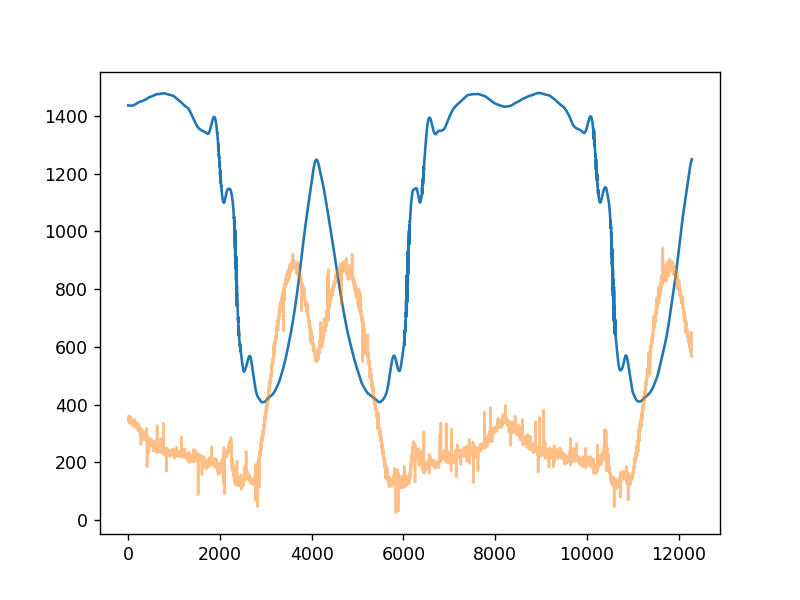

In [175]:
plt.close()
plt.plot(pd2_f, alpha = 1)
plt.plot(pd2, alpha = 0.5)
plt.show()